###### Draine & Bertoldi H2 self-shielding factor $f_{\rm shld,H2}$

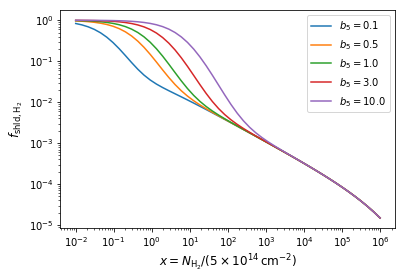

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# b5 = b/(km/s) - velocity dispersion
b5 = np.array([0.1, 0.5, 1.0, 3.0, 10.0])
# x = NH2/(5e14/cm**2)
x = np.logspace(-2.0, 6.0)

for b5_ in b5:
    f_shdH2 = 0.965/(1.0 + x/b5_)**2 + \
              0.035/(1.0 + x)**0.5*np.exp(-8.5e-4*(1.0 + x)**0.5)
    plt.plot(x, f_shdH2, label=r'$b_5={0:3.1f}$'.format(b5_))
    
plt.loglog()
plt.xlabel(r'$x=N_{\rm H_2}/(5 \times 10^{14}\,{\rm cm}^{-2})$')
plt.ylabel(r'$f_{\rm shld,H_2}$')
plt.legend(loc=1)

###### Equilibrium H2 in the absence of FUV (Gong+18)

Text(0.5,0.98,'Equilibrium H2 abundance with only CR destruction')

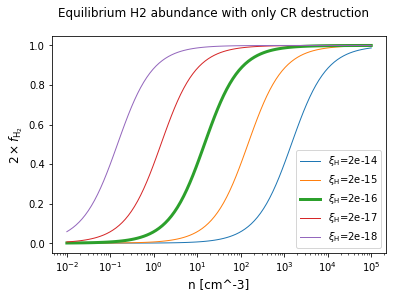

In [3]:
xi_H = [2.0e-14, 2.0e-15, 2.0e-16, 2.0e-17, 2.0e-18]
for xi_H_ in xi_H:
    R_gr = 3.0e-17

    n = np.logspace(-2, 5, 100)
    a = 2.31*xi_H_
    b = -2.0*R_gr*n - 4.95*xi_H_
    c = n*R_gr

    fH2 = (-b - np.sqrt(b**2 - 4.0*a*c))/(2.0*a)
    if xi_H_ == 2.0e-16:
        lw = 3
    else:
        lw = 1
    plt.semilogx(n, 2.0*fH2, lw=lw, label=r'$\xi_{\rm H}$=' + str(xi_H_))

plt.legend()
plt.xlabel('n [cm^-3]')
plt.ylabel(r'$2\times f_{\rm H_2}$')
plt.suptitle('Equilibrium H2 abundance with only CR destruction')

##### H2 equilibrium abundance in the presence of dissociating (LW) radiation?

Let's simply assume (__does this make sense?__)

\begin{equation}
f_{\rm H_2}(1.65 k_{\rm CR} + \zeta_{\rm diss}) = f_{\rm H}n k_{\rm gr}
\end{equation}

similar to Eq 18 in Gong+18, where $k_{\rm gr} = 3.0\times 10^{-17}\;{\rm cm}^{3}\,{\rm s}^{-1}$ is the effective rate coefficient for grain catalysis of H2, $k_{\rm CR} = 2\xi_{\rm H}(2.3f_{\rm H_2} + 1.5 f_{\rm H})$ is the rate coefficient for cosmic ray induced ionization and 

\begin{align}
    \zeta_{\rm diss} & (= R_{\rm thick} = R_{\rm thin} \times f_{\rm shld,dust} \times f_{\rm shld,H2}) \\ 
    & = \zeta_{\rm diss,0} \times \dfrac{u_{\rm LW,dust-only}}{u_{\rm LW,0}} \times \dfrac{u_{\rm LW,dust+H2}}{u_{\rm LW,dust-only}} \\
    & = \zeta_{\rm diss,0} \times \dfrac{u_{\rm LW,dust+H2}}{u_{\rm LW,0}} \\
    & = \zeta_{\rm diss,0} \times u_{\rm LW,0}^{-1} \times \sum_{\rm k} \dfrac{L_{\rm{LW},k}}{4\pi |\mathbf{r}-\mathbf{r}_k|^2 c} e^{-\tau_{\rm LW}(\mathbf{r},\mathbf{r}_k)} \times f_{\rm shld,H2}(N_{\rm H_2}(\mathbf{r},\mathbf{r}_k))
\end{align}

is the H2 photodissociation rate scaled by $\zeta_{\rm diss,0} = 5.7 \times 10^{-11}\;{\rm s}^{-1}$ for the ISRF with energy density in the wavelength range (912-1100) $u_{\rm LW,0} = 9.56\times 10^{-15}\,{\rm erg}\,{\rm cm}^{-3}$. 

The dust optical depth $\tau_{\rm LW}$ is the dust optical depth from the source to the cell for the photoelectric heating in the wavelenth range $\lambda = 912 - 1100 \,\mathring{A}$. Dust shielding is accounted for by $\tau_{\rm LW}$ while H2 shielding at LW-bands is accounted for by using Draine \& Bertoldi's formula.

---

* In the ray tracing, we need to store H2 abundance to calculate the shielding factor. 


* I have set $L_{\rm LW} = L_{\rm FUV}$, so we are overestimating $u_{\rm LW,dust-only}$ by a factor of a few or several.


* __Adopted $\sigma_{\rm d,LW} = 10^{-21}\,{\rm cm}^{2}\,{\rm H}^{-1}$. Not completely sure if this value is reasonable. If $\langle\sigma_{\rm d,LW(912-1100)}\rangle \approx \langle\sigma_{\rm d,FUV(912-2460)}\rangle$, we would not need to have a separate freqency bin for LW and scale the photodissociation rate by $u_{\rm FUV,0,ISRF}$.__

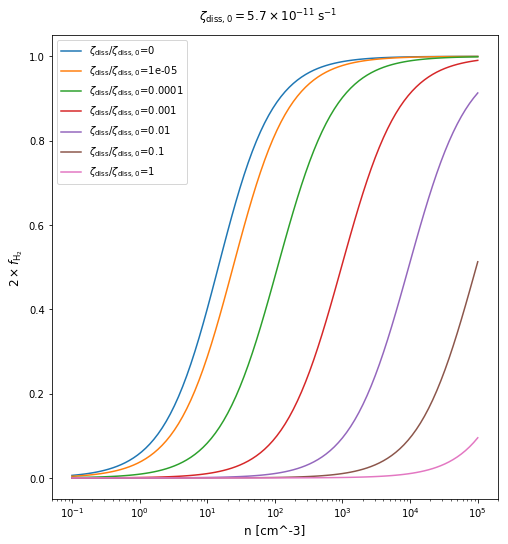

In [4]:
def calc_fH2_equil(n, xi_H = 2.0e-16, R_gr = 3.0e-17, zeta=5.7e-11):
    a = 2.31*xi_H
    b = -2.0*R_gr*n - 4.95*xi_H - zeta
    c = n*R_gr
    return (-b - np.sqrt(b**2 - 4.0*a*c))/(2.0*a)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
n = np.logspace(-1, 5, 100)
zeta0 = 5.7e-11
zeta = zeta0*np.logspace(-5, 0, num=6)
zeta = np.insert(zeta, 0, 0.0)

for zeta_ in zeta:
    fH2_ = calc_fH2_equil(n,zeta=zeta_)
    label_ = r'$\zeta_{\rm{diss}}/\zeta_{\rm{diss,0}}$' + \
            '={0:g}'.format(zeta_/5.7e-11)
    plt.semilogx(n, 2.0*fH2_,label=label_)
#plt.semilogx(n, 2.0*fH2)
plt.xlabel('n [cm^-3]')
plt.ylabel(r'$2\times f_{\rm H_2}$')
plt.legend(loc=2)
plt.suptitle(r'$\zeta_{\rm diss,0} = 5.7\times 10^{-11}\;{\rm s}^{-1}$')
plt.subplots_adjust(top=0.93)

###### CH12. (p.124) of Draine (2011)

> Mathis et al. (1983) radiation field is a good estimate for the ISRF in the solar neighborhood.
  
For the Lyman-Werner band
\begin{equation}
    \nu u_{\nu} = 1.287\times 10^{-9}(\lambda / \mu{\rm m})^{4.4172}\,{\rm erg}\,{\rm cm}^{-3} \;\;\;\; (912 - 1100\;\mathring{A})
\end{equation}

In [6]:
import astropy.units as au
import astropy.constants as ac

nu0 = ac.c/(912.0*au.AA)
nu1 = ac.c/(1100.0*au.AA)
#np.log(nu0.to('Hz')),nu1.to('Hz')

In [7]:
u1 = (0.246**-0.6668 - 0.134**-0.6668)/(-0.6678)*2.373e-14
u2 = (0.134 - 0.11)*6.825e-13
u3 = (0.11**4.4172 - 0.0912**4.4172)/4.4172*1.287e-9
u1,u2,u3,u1+u2+u3,(u1+u2+u3)/5.29e-14

(4.5210360802032486e-14,
 1.6380000000000005e-14,
 9.563227526020834e-15,
 7.115358832805333e-14,
 1.3450583804925014)

__Therefore, Mathis+83 model gives__

\begin{equation}
u_{\rm LW (912-1100),ISRF} = 9.56\times 10^{-15}\,{\rm erg}\,{\rm cm}^{-3}
\end{equation}

In [8]:
import yt
import os, sys
sys.path.append('../../..')
import tigradpy as tp
import numpy as np
import astropy.units as au

yt.funcs.mylog.setLevel(50)
#datadir = '/home/jk11/athena-tigress/bin'
#datadir = '/tigress/jk11/radps_postproc/rad_8pc_dmax1024_H2/'
#datadir = '/tigress/jk11/radps_postproc/rad_8pc_dmax1024_H2_CR_only/'
#datadir = '/tigress/jk11/radps_postproc/MHD_4pc_new_dmax512_H2/'

datadir = '/scratch/gpfs/jk11/radps_postproc/MHD_4pc_new_dmax1024_H2/'
num = 2
problem_id = 'MHD_4pc_new'
filename = os.path.join(datadir, '{0:s}.{1:04d}.vtk'.format(problem_id, num))
ds = yt.load(filename)

/home/jk11/miniconda2/lib/python2.7/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/home/jk11/miniconda2/lib/python2.7/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


In [9]:
print(ds.current_time)

360.0004 code_time


In [10]:
Nx, Ny, Nz = ds.domain_dimensions
iz = ds.domain_dimensions[2]/2 - 1
extent = (ds.domain_left_edge.v[0], ds.domain_right_edge.v[0],
          ds.domain_left_edge.v[1], ds.domain_right_edge.v[1])
da = ds.all_data()
nH = da['density'].v.reshape(Nx,Ny,Nz)
nH2 = (da['density'].v*da['specific_scalar[3]'].v).reshape(Nx,Ny,Nz)
Erad = (da['rad_energy_density0'].v).reshape(Nx,Ny,Nz)
Erad_LW = (da['rad_energy_density_LW'].v).reshape(Nx,Ny,Nz)
Erad_pr = np.average(Erad, axis=2)
Erad_LW_pr = np.average(Erad_LW, axis=2)

fH2 = (da['specific_scalar[3]'].v).reshape(Nx,Ny,Nz)

lunit = au.pc.to('cm')

NH = nH.sum(axis=2)*lunit
NH2 = nH2.sum(axis=2)*lunit

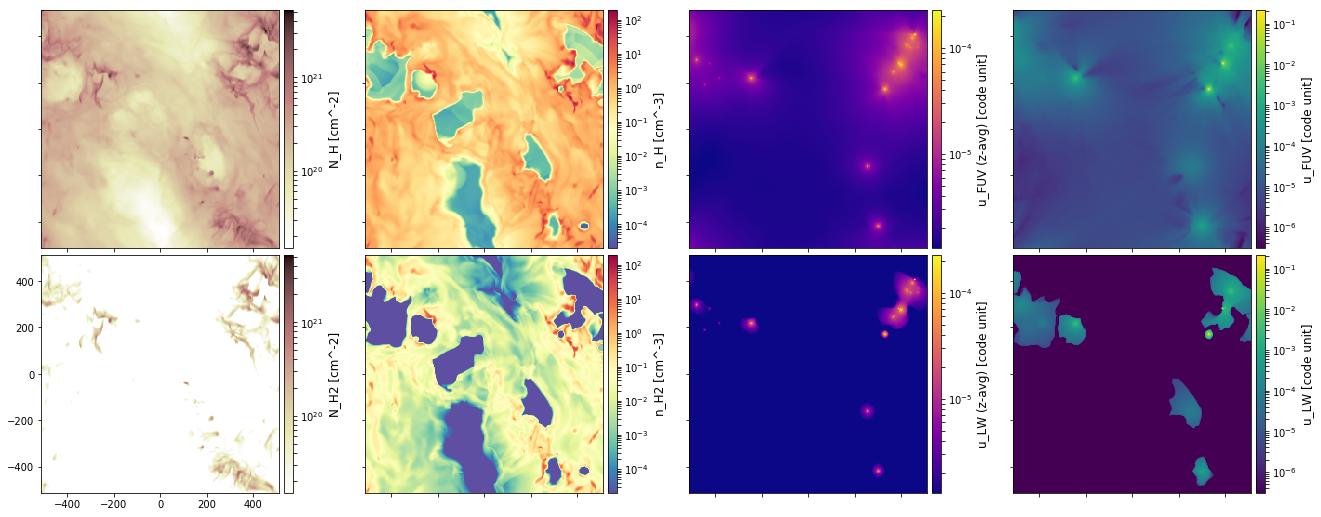

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(20, 12))
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols=(2,4), axes_pad=(1.0,0.1),
                label_mode="1", share_all=True,
                cbar_location="right", cbar_mode="each",
                cbar_size="4%", cbar_pad="2%")

data = (NH, nH[:,:,iz], Erad_pr, Erad[:,:,iz],
        NH2, nH2[:,:,iz], Erad_LW_pr, Erad_LW[:,:,iz])
cmap = ('pink_r', 'Spectral_r', 'plasma', 'viridis',
        'pink_r', 'Spectral_r', 'plasma', 'viridis')
label = (r'N_H [cm^-2]', r'n_H [cm^-3]',
         r'u_FUV (z-avg) [code unit]', r'u_FUV [code unit]',
         r'N_H2 [cm^-2]', r'n_H2 [cm^-3]',
         r'u_LW (z-avg) [code unit]', r'u_LW [code unit]')

im = []
for i, (data_, cmap_, label_) in enumerate(zip(data, cmap, label)):
    plt.sca(grid[i].axes)
    if i >= 4:
        vmin = data[i-4].min()
        vmax = data[i-4].max()
    else:
        vmin = data_.min()
        vmax = data_.max()
    norm = mpl.colors.LogNorm()
    im_ = plt.imshow(data_.T, vmin=vmin, vmax=vmax, cmap=cmap_,
                     norm=norm, origin='lower', extent=extent)
    im.append(im_)
    cbar = plt.colorbar(im_, cax=grid.cbar_axes[i])
    cbar.set_label(label_)

__Distributions of f_H2 vs. gas density n (Fig 4 in Gong+18)__

/home/jk11/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0,0.5,'$2\\times f_{\\rm H_2}$')

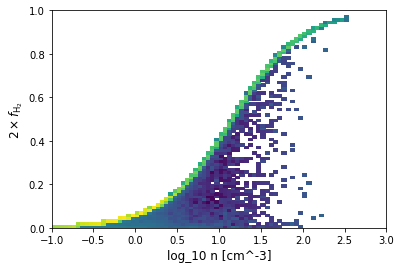

In [12]:
hist,xe,ye = np.histogram2d(np.log10(nH).flatten(), 2.0*fH2.flatten(),
                            bins=80, range=np.array([[-1, 3], [0, 1]]),
                            weights=nH.flatten())
X, Y = np.meshgrid(xe, ye)
plt.pcolormesh(X, Y, np.log10(hist.T))
plt.xlabel('log_10 n [cm^-3]')
plt.ylabel(r'$2\times f_{\rm H_2}$')

With higher spatial resolution, $f_{\rm H2}$ would be smaller than the CR-only estimate at higher $n$. 

__Distribution of shielding factor vs. density__

/home/jk11/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/jk11/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/home/jk11/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0,0.5,'effective fshld,H2')

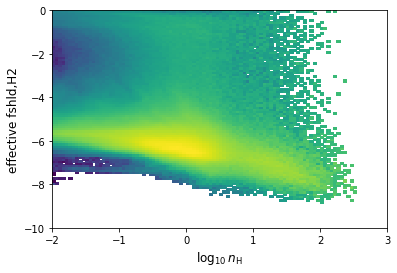

In [13]:
hist,xe,ye = np.histogram2d(np.log10(nH).flatten(), np.log10(Erad_LW/Erad).flatten(),
                            bins=100, range=np.array([[-2, 3], [-10,0]]),
                            weights=nH.flatten())
X, Y = np.meshgrid(xe, ye)
plt.pcolormesh(X, Y, np.log10(hist.T))
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'effective fshld,H2')

__Slice of difference in equilibrium $f_{\rm H_2}$ with/without dissociating FUV__

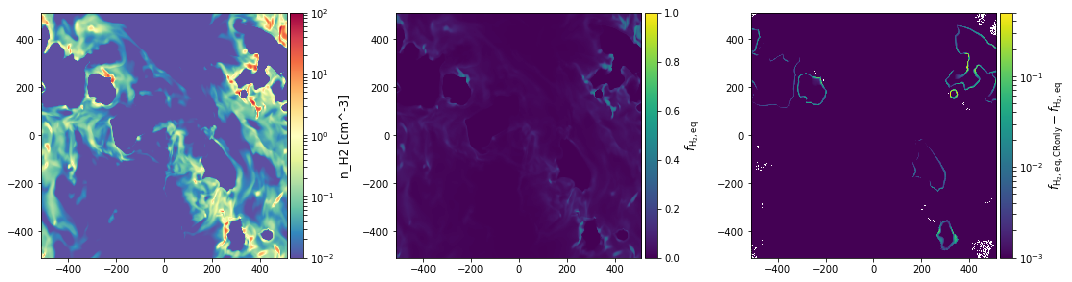

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
xi_H = 2e-16
nH = da['density'].v.reshape(Nx,Ny,Nz)
aa = 2.31*xi_H
bb = -2.0*R_gr*nH - 4.95*xi_H
cc = nH*R_gr
fH2_CR_only = (-bb - np.sqrt(bb**2 - 4.0*aa*cc))/(2.0*aa)
dfH2 = fH2_CR_only - fH2
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.sca(axes[0])
im0 = plt.imshow(nH2[:,:,iz].T, extent=extent, vmin=1e-2, vmax=1e2, origin='lower',
               norm=mpl.colors.LogNorm(), cmap='Spectral_r')
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cb0 = plt.colorbar(im0, cax=cax0)
cb0.set_label(r'n_H2 [cm^-3]')

plt.sca(axes[1])
im1 = plt.imshow(fH2[:,:,iz].T, extent=extent, vmin=0.0, vmax=1, origin='lower',
               norm=mpl.colors.Normalize())
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$f_{\rm H_2,eq}$')

plt.sca(axes[2])
im2 = plt.imshow(dfH2[:,:,iz].T, extent=extent, vmin=0.001, vmax=0.5, origin='lower',
               norm=mpl.colors.LogNorm())
divider = make_axes_locatable(axes[2])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cb2 = plt.colorbar(im2, cax=cax2)
cb2.set_label(r'$f_{\rm H_2,eq,CR only} - f_{\rm H_2,eq}$')
plt.tight_layout()

In [71]:
nH1d = nH.flatten()
nH21d = nH2.flatten()
x = 2.0*fH2.flatten()
y = 2.0*fH2_CR_only.flatten()
H, xe, ye = np.histogram2d(x, y, bins=[100,100], range=[[0,1],[0,1]], density=True)

In [101]:
## Total molecular mass [Msun] of cells where dfH2 is larger than thres
thres = 1e-2
print('Total molecular mass [Msun] of cells where dfH2 is larger than thres:')
print(nH21d[(y - x > thres)].sum()*(4.0*lunit**3)/2e33*2.3e-24)
## Mass fraction
print('Mass fraction:',nH21d[(y - x > thres)].sum()/nH21d.sum())

Total molecular mass [Msun] of cells where dfH2 is larger than thres:
744.8209530796495
('Mass fraction:', 0.01649794893813624)


(array([1609., 2170., 1307.,  793.,  478.,  321.,  143.,   75.,   28.,
           7.]),
 array([-0.05674591,  0.17421507,  0.40517605,  0.63613703,  0.86709802,
         1.098059  ,  1.32901998,  1.55998097,  1.79094195,  2.02190293,
         2.25286392]),
 <a list of 10 Patch objects>)

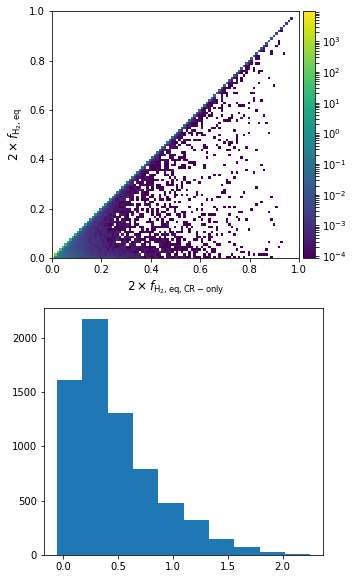

In [88]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(2, 1, figsize=(5, 10))
plt.sca(axes[0])
im = plt.imshow(H, norm=mpl.colors.LogNorm(), origin='lower',
                extent=(0, 1, 0, 1))
plt.xlabel(r'$2\times f_{\rm H_2,eq,CR-only}$')
plt.ylabel(r'$2\times f_{\rm H_2,eq}$')
div = make_axes_locatable(axes[0])
cax = div.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.sca(axes[1])
plt.hist(np.log10(nH1d[(diff_fH2 > 0.05)]))
plt.


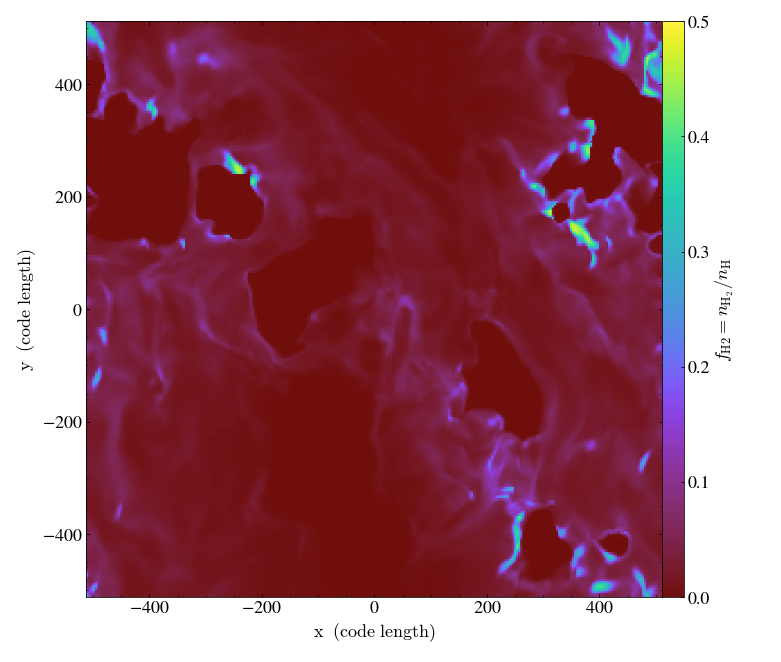
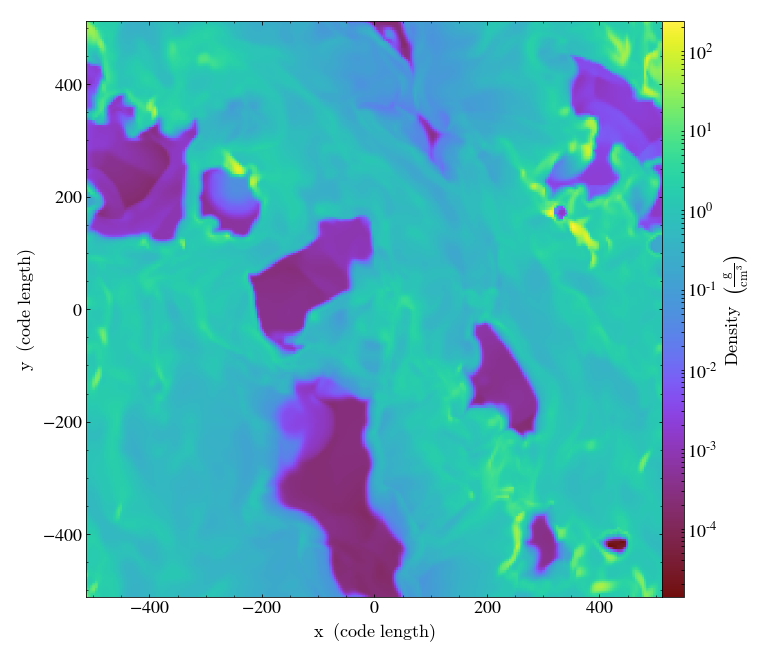
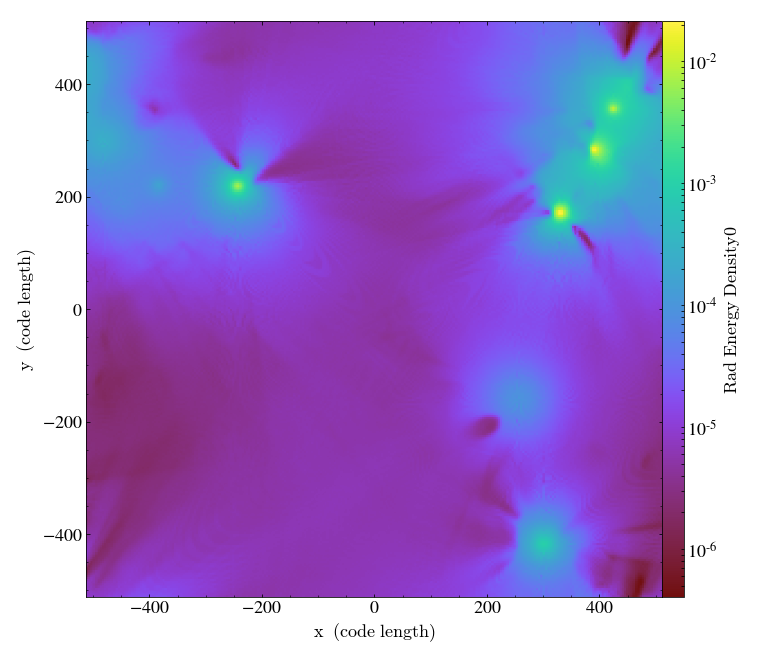
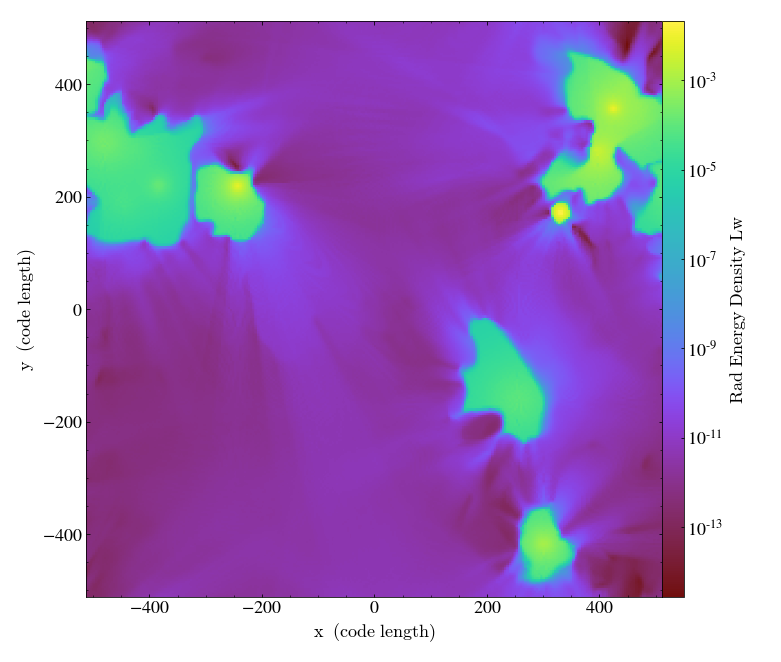

In [6]:
sl = yt.SlicePlot(ds,'z',['density','rad_energy_density0',
                          'rad_energy_density_LW','specific_scalar[3]'])
sl.set_log('specific_scalar[3]', False)
sl.set_zlim('specific_scalar[3]', 0, 0.5)
sl.set_colorbar_label('specific_scalar[3]',
                      r'$f_{\rm H2}=n_{\rm H_2}/n_{\rm H}$')
sl.show()